In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
#sorted(b.items(), key = lambda kv: -kv[1])

In [8]:
import torch

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

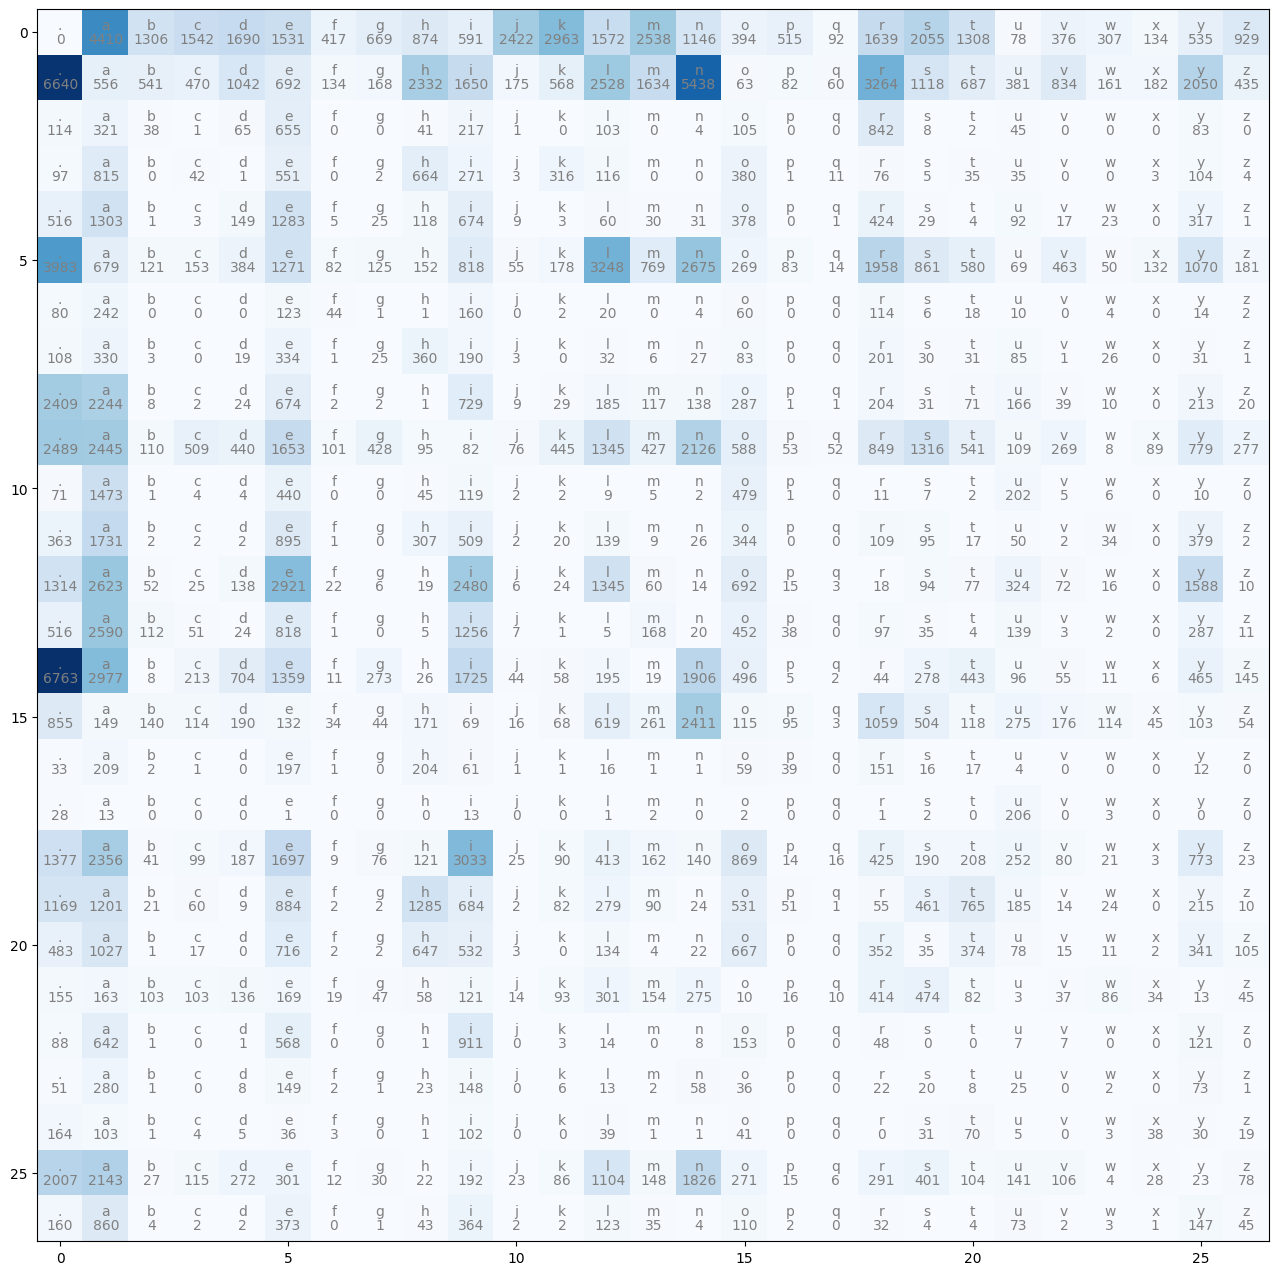

In [13]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27): 
    for j in range(27): 
        chstr = itos[j] 
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray") 
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis=('off')


In [14]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [17]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [18]:
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

In [19]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [20]:
log_likehood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likehood += logprob
        n += 1
        #print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likehood=}")
nll = -log_likehood
print(f"{nll=}")
print(f"{nll/n}")

log_likehood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [21]:
# bigram (X, y) şeklinde bir eğitim seti oluştur

In [22]:
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [23]:
xs

tensor([ 0,  5, 13, 13,  1])

In [24]:
ys

tensor([ 5, 13, 13,  1,  0])

In [25]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
xenc.shape

torch.Size([5, 27])

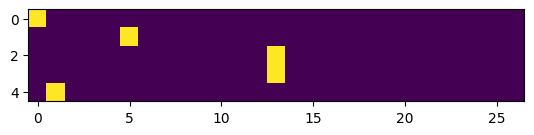

In [27]:
plt.imshow(xenc)

In [37]:
W = torch.randn((27,27))

In [38]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0058, 0.0508, 0.0308, 0.0375, 0.0115, 0.0700, 0.1291, 0.0203, 0.1207,
         0.0041, 0.0477, 0.0802, 0.0350, 0.0208, 0.0390, 0.0059, 0.0059, 0.0147,
         0.0520, 0.0061, 0.0110, 0.0139, 0.0364, 0.0474, 0.0333, 0.0163, 0.0540],
        [0.0044, 0.0454, 0.0091, 0.0524, 0.0049, 0.0078, 0.0632, 0.0135, 0.0274,
         0.0092, 0.0204, 0.0431, 0.0082, 0.1314, 0.0062, 0.0597, 0.1891, 0.0623,
         0.0129, 0.0133, 0.0170, 0.0115, 0.0135, 0.0558, 0.0204, 0.0758, 0.0221],
        [0.0456, 0.0531, 0.0320, 0.0151, 0.0520, 0.0044, 0.0217, 0.0143, 0.0153,
         0.0072, 0.0127, 0.0446, 0.0229, 0.0258, 0.0318, 0.0166, 0.0048, 0.1364,
         0.0717, 0.0573, 0.0286, 0.0514, 0.0065, 0.0016, 0.1553, 0.0694, 0.0020],
        [0.0456, 0.0531, 0.0320, 0.0151, 0.0520, 0.0044, 0.0217, 0.0143, 0.0153,
         0.0072, 0.0127, 0.0446, 0.0229, 0.0258, 0.0318, 0.0166, 0.0048, 0.1364,
         0.0717, 0.0573, 0.0286, 0.0514, 0.0065, 0.0016, 0.1553, 0.0694, 0.0020],
        [0.0120, 0.1891,